My attempt at the class Titanic competition:

In [16]:
from fastai.tabular.all import *
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

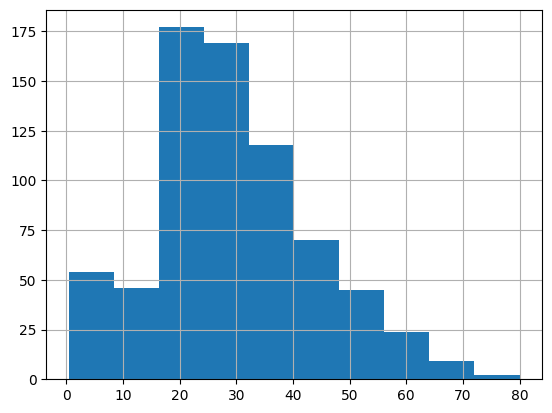

In [19]:
df["Age"].hist()

In [20]:
cat_names = ["Pclass", "Sex", "SibSp", "Embarked"]
cont_names = ["Age", "Fare"]
procs = [Categorify, FillMissing, Normalize]
dls = TabularDataLoaders.from_csv('train.csv', procs=procs, cat_names=cat_names, cont_names=cont_names, 
                                  y_names="Survived", valid_idx=list(range(500,890)), bs=64, y_block = CategoryBlock)

In [21]:
dls.show_batch()

,Pclass,Sex,SibSp,Embarked,Age_na,Age,Fare,Survived
0,1,female,0,C,False,32.000000,76.291702,1
1,3,male,4,Q,False,4.000000,29.125000,0
2,3,male,0,S,False,43.999999,7.925000,1
3,3,female,2,C,False,0.750001,19.258301,1
4,3,male,0,Q,True,28.000000,7.750000,0
5,3,female,0,S,False,24.000000,8.850000,0
6,3,male,0,S,False,26.000000,8.050000,0
7,3,male,0,C,True,28.000000,7.895799,0
8,1,female,1,C,True,28.000000,82.170802,1
9,2,female,0,C,False,17.000000,12.000000,1


In [22]:
learn = tabular_learner(dls, metrics=accuracy)

In [23]:
learn.fit_one_cycle(10)

In [24]:
learn.show_results()

,Pclass,Sex,SibSp,Embarked,Age_na,Age,Fare,Survived,Survived_pred
0,3.0,1.0,2.0,3.0,1.0,-0.228014,-0.328986,0.0,1.0
1,3.0,2.0,1.0,1.0,2.0,-0.074214,-0.515737,0.0,0.0
2,1.0,1.0,1.0,3.0,1.0,1.079288,3.779293,1.0,1.0
3,3.0,2.0,1.0,2.0,2.0,-0.074214,-0.505042,0.0,0.0
4,3.0,2.0,1.0,3.0,2.0,-0.074214,-0.501622,0.0,0.0
5,1.0,2.0,2.0,3.0,1.0,0.540987,0.991429,0.0,1.0
6,1.0,2.0,2.0,3.0,1.0,1.002388,0.438101,1.0,0.0
7,3.0,2.0,1.0,2.0,2.0,-0.074214,-0.159594,0.0,0.0
8,1.0,1.0,1.0,3.0,1.0,1.463789,-0.122155,1.0,1.0


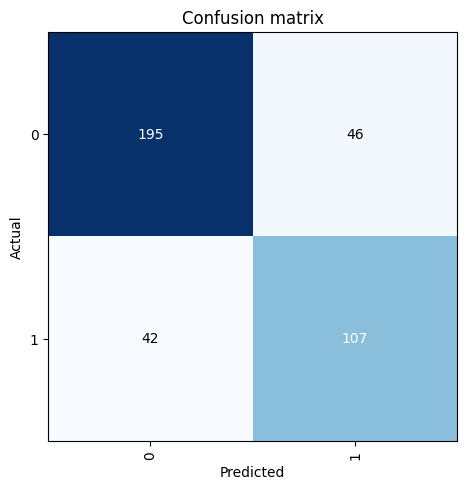

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()